# Sales Prediction Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor    # This is use for classification
from sklearn import metrics

Data Collection and pre-processing / Analysis

In [2]:
sale_data = pd.read_csv('/content/Advertising.csv')

In [3]:
sale_data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
sale_data.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [6]:
sale_data.shape

(200, 5)

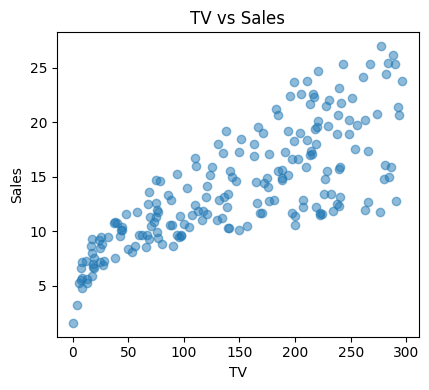

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(sale_data['TV'], sale_data['Sales'], alpha=0.5)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

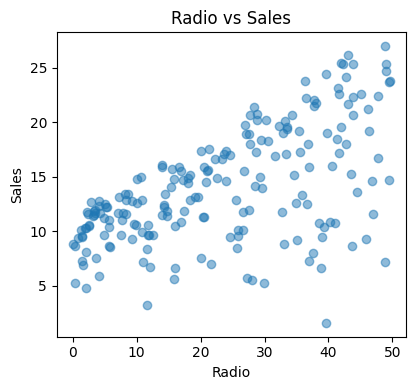

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.scatter(sale_data['Radio'], sale_data['Sales'], alpha=0.5)
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

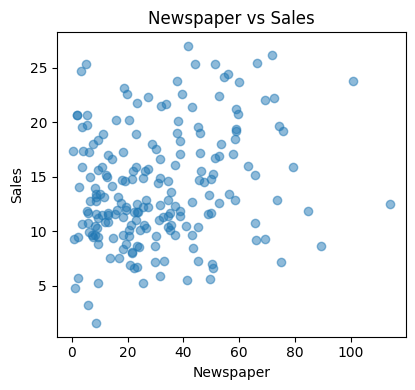

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 3)
plt.scatter(sale_data['Newspaper'], sale_data['Sales'], alpha=0.5)
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

Classify the data

In [14]:
X = sale_data[['TV', 'Radio', 'Newspaper']]
y = sale_data['Sales']

In [15]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

Make Prediction

In [21]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(" ")
print(f'R-squared: {r2}')

Mean Squared Error: 3.1740973539761033
 
R-squared: 0.899438024100912


In [23]:
# Coefficients of the model
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(" ")
print(f'Intercept: {intercept}')

Coefficients: [0.04472952 0.18919505 0.00276111]
 
Intercept: 2.979067338122629


Plot actual vs prediction value

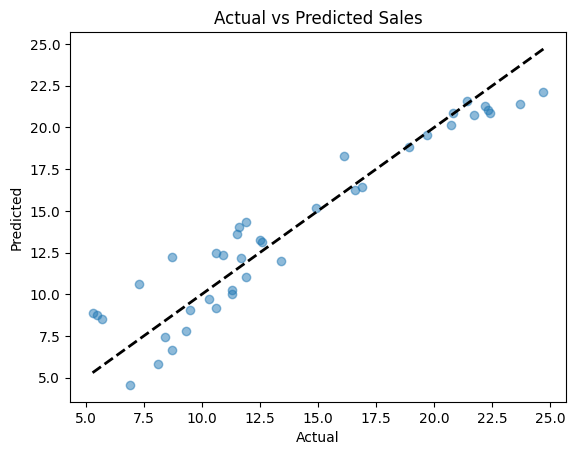

In [24]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()

<ipython-input-26-d0f69304f75a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred, bins=20, kde=True)


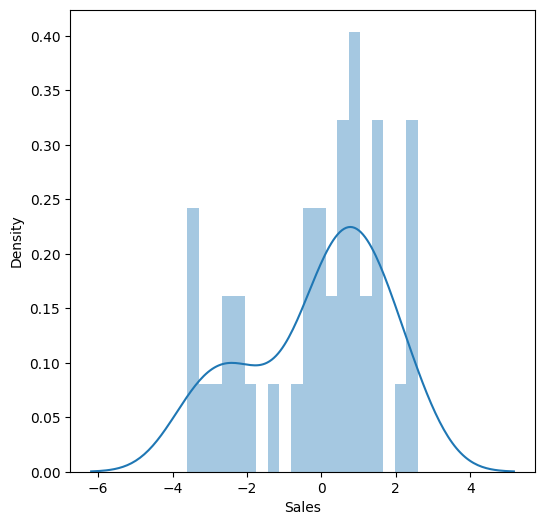

In [26]:
plt.figure(figsize=(6, 6))
sns.distplot(y_test - y_pred, bins=20, kde=True)
plt.show()

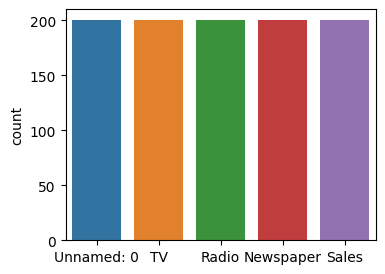

In [34]:
plt.figure(figsize=(4, 3))
sns.countplot(sale_data)
plt.show()

In [35]:
new_data = pd.DataFrame({'TV': [230.1], 'Radio': [37.8], 'Newspaper': [69.2]})
predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 20.613971470156297


In [38]:
new_data = pd.DataFrame({'TV': [27.5], 'Radio': [1.6], 'Newspaper': [20.7]})
predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 4.568996222153632


In [39]:
new_data = pd.DataFrame({'TV': [213.4], 'Radio': [24.6], 'Newspaper': [13.1]})
predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 17.214715297984263


In [40]:
new_data = pd.DataFrame({'TV': [107.4], 'Radio': [14], 'Newspaper': [10.9]})
predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 10.461844419864937
